In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import compress
import math

In [42]:
# Read the files
cocaine_listings = pd.read_csv('dream_market_cocaine_listings.csv')
product_descriptions = pd.read_csv('product_rating_modified.txt', header = None, sep = '\', \'', engine = 'python')

In [43]:
# Remove leading ' from first column
temp = [string[1:] for string in product_descriptions.iloc[:,0]]
product_descriptions.iloc[:,0] = temp

In [46]:
# Count vendors for each location (want to remove columns with all 0s)
# Get list of columns which have all zeros
all_zero_cols = list(cocaine_listings.iloc[:,16:].sum().index[cocaine_listings.iloc[:,16:].sum()==0])

# Drop columns which have all zeros
cocaine_listings = cocaine_listings.drop(all_zero_cols,axis = 1)

In [50]:
# Get subset of dataframe matching query
cocaine_listings.query('ships_to == \'US\'')
cocaine_listings.query('quality < 60')

,Unnamed: 0,product_title,ships_from_to,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,product_link,...,ships_to_WW,ships_from_WW,ships_to_SI,ships_from_IT,ships_to_CH,ships_from_CH,ships_from_BR,ships_from_CZ,ships_from_SE,ships_from_CN
28,90,**JULY 2017** 14G of MK1 (50%) *Columbiana,GB → EU,14.0,50.0,0.24060,0.017186,0.034371,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
29,93,**JULY 2017** 1G of MK1 (50%) *Columbiana,GB → EU,1.0,50.0,0.02054,0.020540,0.041080,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
30,96,**JULY 2017** 28G of MK1 (50%) *Columbiana,GB → EU,28.0,50.0,0.46600,0.016643,0.033286,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
31,99,**JULY 2017** 3.5G of MK1 (50%) *Columbiana,GB → EU,3.5,50.0,0.07040,0.020114,0.040229,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
32,103,**JULY 2017** 7G of MK1 (50%) *Columbiana,GB → EU,7.0,50.0,0.12900,0.018429,0.036857,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
750,2037,2g Cocaine 50% purity,GB → GB,2.0,50.0,0.04810,0.024050,0.048100,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
815,2268,3.5g Cocaine 50% purity,GB → GB,3.5,50.0,0.07630,0.021800,0.043600,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
856,2376,3g Cocaine 50% purity,GB → GB,3.0,50.0,0.06860,0.022867,0.045733,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
1039,2853,5g Cocaine 50% purity,GB → GB,5.0,50.0,0.10560,0.021120,0.042240,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
1109,3108,7g Cocaine 50% purity,GB → GB,7.0,50.0,0.14380,0.020543,0.041086,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False


In [51]:
# Wrapper function for histogram (numeric)
def makehist(col_name, bins = 15):
    n, bins, patches = plt.hist(x=cocaine_listings[col_name], bins=bins, color='#0504aa')
    plt.xlabel(col_name)
    plt.ylabel('Frequency')
    plt.show()
    
# Wrapper function for histogram (categorical)
def makehist_cat(col_name):
    cocaine_listings[col_name].value_counts().plot(kind='bar')
    plt.xlabel(col_name)
    plt.ylabel('Frequency')
    plt.show()

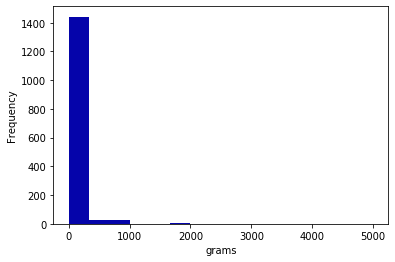

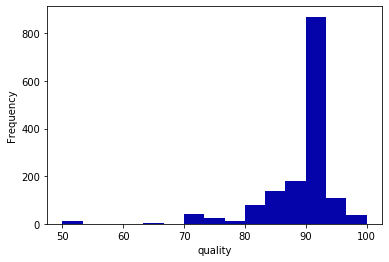

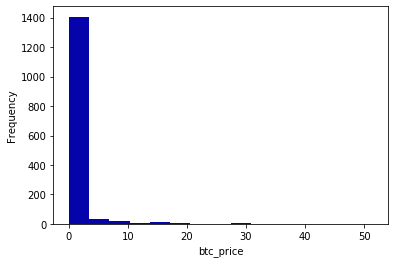

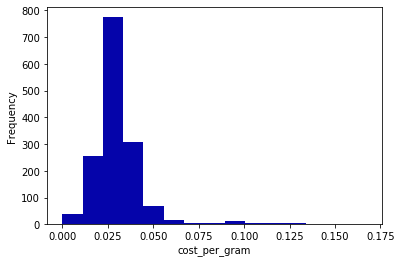

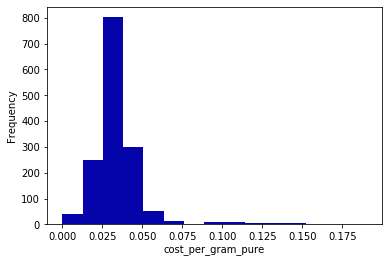

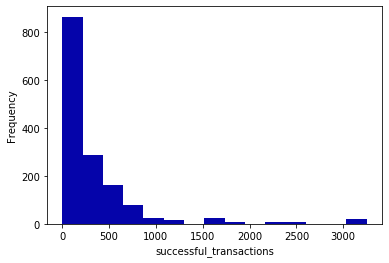

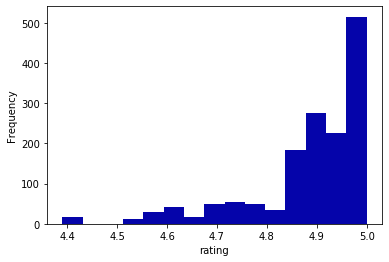

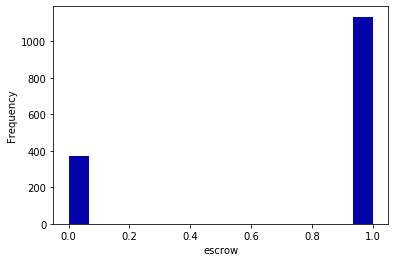

In [52]:
# Make histogram for each numeric column
makehist('grams', bins = 15)
makehist('quality', bins = 15)
makehist('btc_price', bins = 15)
makehist('cost_per_gram')
makehist('cost_per_gram_pure')
makehist('successful_transactions')
makehist('rating')
makehist('escrow')

In [53]:
# Create dictionary tallying sales for each location
partial_header_list = list(cocaine_listings)[16:]
location_tally = {item : np.sum(cocaine_listings[item]) for item in partial_header_list}

In [54]:
# Get indices for items shipping to/from 
ship_to_idx = ['_to_' in string for string in list(location_tally.keys())]
ship_from_idx = ['_from_' in string for string in list(location_tally.keys())]

# Now get list of headers for from/to
ship_from = list(compress(list(location_tally.keys()), ship_from_idx))
ship_from = [item[11:] for item in ship_from] # Only get country ID
ship_to = list(compress(list(location_tally.keys()), ship_to_idx))
ship_to = [item[9:] for item in ship_to] # Only get country ID

In [55]:
# Use comprehension to get tally for shipping from and to
ship_from_tally = [location_tally['ships_from_'+item] for item in ship_from]
ship_to_tally = [location_tally['ships_to_'+item] for item in ship_to]

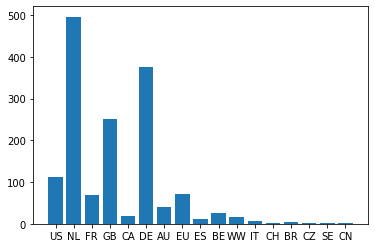

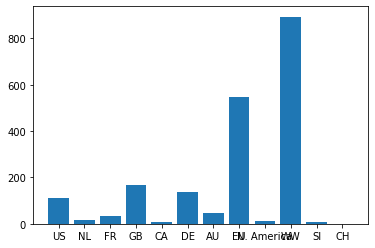

In [56]:
# Plotting by shipping from/to
plt.bar(ship_from,ship_from_tally)
plt.show()
plt.bar(ship_to,ship_to_tally)
plt.show()

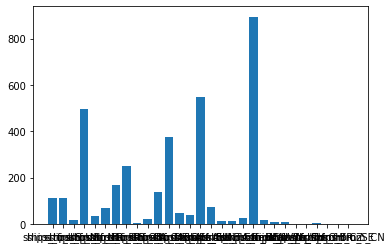

In [61]:
# Plot ship from/to location by frequency
plt.bar(list(location_tally.keys()),list(location_tally.values()))
plt.show()

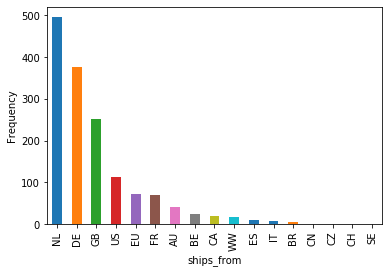

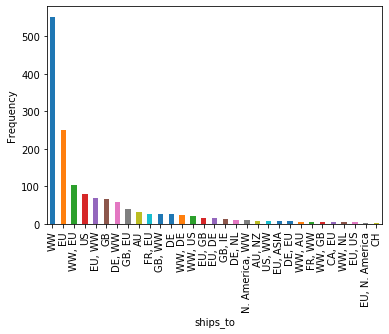

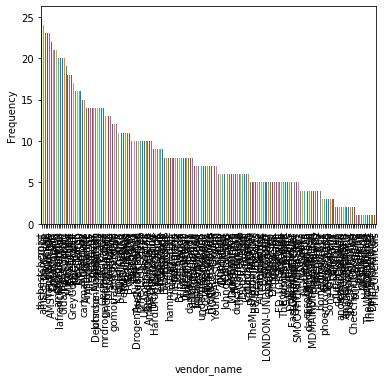

In [62]:
# Histograms for categorical data
makehist_cat('ships_from')
makehist_cat('ships_to')
makehist_cat('vendor_name')

In [63]:
# Get avg price by origin/destination country
def getMeanCountryStats(country):
    return(np.mean(cocaine_listings.query('ships_from=='+country)[['grams','quality','btc_price','cost_per_gram', \
                                               'cost_per_gram_pure','successful_transactions','rating']]))

In [64]:
getMeanCountryStats('\'US\'')

grams                       49.735268
quality                     89.964286
btc_price                    0.903358
cost_per_gram                0.032457
cost_per_gram_pure           0.036194
successful_transactions    198.571429
rating                       4.908393
dtype: float64

In [78]:
avg_grams = [getMeanCountryStats('\''+country+'\'')['grams'] for country in ship_from]
avg_quality = [getMeanCountryStats('\''+country+'\'')['quality'] for country in ship_from]
avg_btc_price = [getMeanCountryStats('\''+country+'\'')['btc_price'] for country in ship_from]
avg_cost_per_gram = [getMeanCountryStats('\''+country+'\'')['cost_per_gram'] for country in ship_from]
avg_cost_per_gram_pure = [getMeanCountryStats('\''+country+'\'')['cost_per_gram_pure'] for country in ship_from]
successful_transactions = [getMeanCountryStats('\''+country+'\'')['successful_transactions'] for country in ship_from]

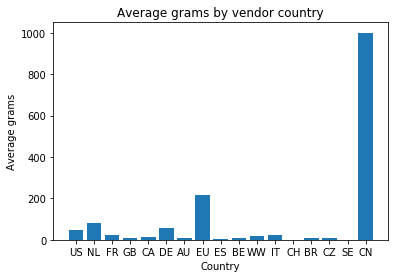

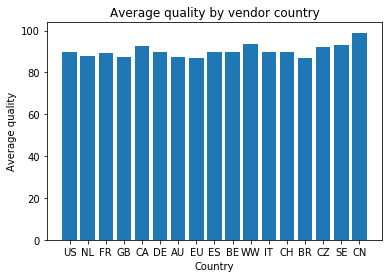

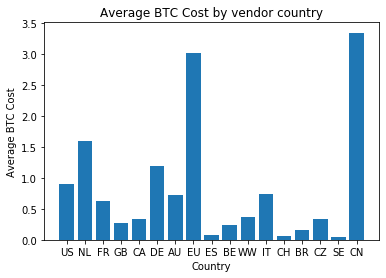

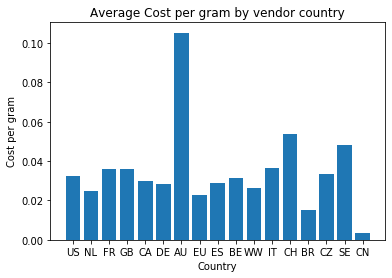

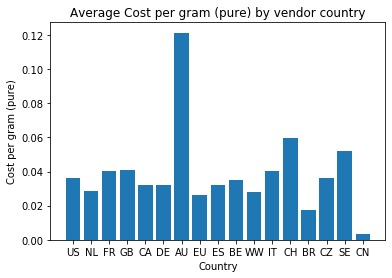

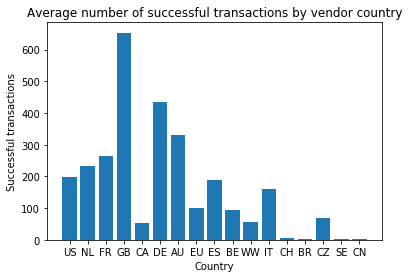

In [81]:
plt.bar(ship_from, avg_grams)
plt.title('Average grams by vendor country')
plt.xlabel('Country')
plt.ylabel('Average grams')
plt.show()

plt.bar(ship_from, avg_quality)
plt.title('Average quality by vendor country')
plt.xlabel('Country')
plt.ylabel('Average quality')
plt.show()

plt.bar(ship_from, avg_btc_price)
plt.title('Average BTC Cost by vendor country')
plt.xlabel('Country')
plt.ylabel('Average BTC Cost')
plt.show()

plt.bar(ship_from, avg_cost_per_gram)
plt.title('Average Cost per gram by vendor country')
plt.xlabel('Country')
plt.ylabel('Cost per gram')
plt.show()

plt.bar(ship_from, avg_cost_per_gram_pure)
plt.title('Average Cost per gram (pure) by vendor country')
plt.xlabel('Country')
plt.ylabel('Cost per gram (pure)')
plt.show()

plt.bar(ship_from, successful_transactions)
plt.title('Average number of successful transactions by vendor country')
plt.xlabel('Country')
plt.ylabel('Successful transactions')
plt.show()

In [76]:
print(avg_cost_per_gram_pure)
print(avg_cost_per_gram)

[0.036193908950580354, 0.028444160420302383, 0.0400236346485, 0.04102590921255782, 0.03231228594105264, 0.03193510898446114, 0.12128214667199999, 0.026046768626541674, 0.03227931319572727, 0.0352782450044, 0.028157088883749994, 0.04046931217, 0.05977777778, 0.017577011494, 0.03630434783, 0.051817204299999996, 0.003383838384]
[0.03245665965142858, 0.024928328472580617, 0.03575467278957142, 0.03587600660820717, 0.029708784460526317, 0.028563495189130338, 0.10529428571449999, 0.022560947751111116, 0.028997688311818183, 0.0316382095236, 0.026371607143124996, 0.03642238095285715, 0.0538, 0.015292, 0.0334, 0.04819, 0.00335]


In [69]:
cocaine_listings.head()

,Unnamed: 0,product_title,ships_from_to,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,product_link,...,ships_to_WW,ships_from_WW,ships_to_SI,ships_from_IT,ships_to_CH,ships_from_CH,ships_from_BR,ships_from_CZ,ships_from_SE,ships_from_CN
0,10,!!!!!INTRO OFFER!!!!! 1GR COCAINE 90%,NL → EU,1.0,90.0,0.02577,0.02577,0.028633,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
1,11,!!!!!INTRO OFFER!!!!! 2GR COCAINE 90%,NL → EU,2.0,90.0,0.05150,0.02575,0.028611,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
2,14,!!!INTRO!!! 0.5G COCAINE 89% - STRAIGHT FROM T...,NL → EU,0.5,89.0,0.01649,0.03298,0.037056,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
3,20,!1G! C O L O M B I A N C O C A I N E - 89% PURITY,FR → EU,1.0,89.0,0.04120,0.04120,0.046292,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
4,41,** 1 Gram 87% Pure Uncut Colombian Cocaine **,NL → WW,1.0,87.0,0.03400,0.03400,0.039080,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,True,False,False,False,False,False,False,False,False,False


In [77]:
list(cocaine_listings)

['Unnamed: 0',
 'product_title',
 'ships_from_to',
 'grams',
 'quality',
 'btc_price',
 'cost_per_gram',
 'cost_per_gram_pure',
 'escrow',
 'product_link',
 'vendor_link',
 'vendor_name',
 'successful_transactions',
 'rating',
 'ships_from',
 'ships_to',
 'ships_to_US',
 'ships_from_US',
 'ships_to_NL',
 'ships_from_NL',
 'ships_to_FR',
 'ships_from_FR',
 'ships_to_GB',
 'ships_from_GB',
 'ships_to_CA',
 'ships_from_CA',
 'ships_to_DE',
 'ships_from_DE',
 'ships_to_AU',
 'ships_from_AU',
 'ships_to_EU',
 'ships_from_EU',
 'ships_from_ES',
 'ships_to_N. America',
 'ships_from_BE',
 'ships_to_WW',
 'ships_from_WW',
 'ships_to_SI',
 'ships_from_IT',
 'ships_to_CH',
 'ships_from_CH',
 'ships_from_BR',
 'ships_from_CZ',
 'ships_from_SE',
 'ships_from_CN']